In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels),(test_images,test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
test_images = test_images.reshape((10000,28,28,1))
train_images,test_images = train_images / 255.0, test_images / 255.0

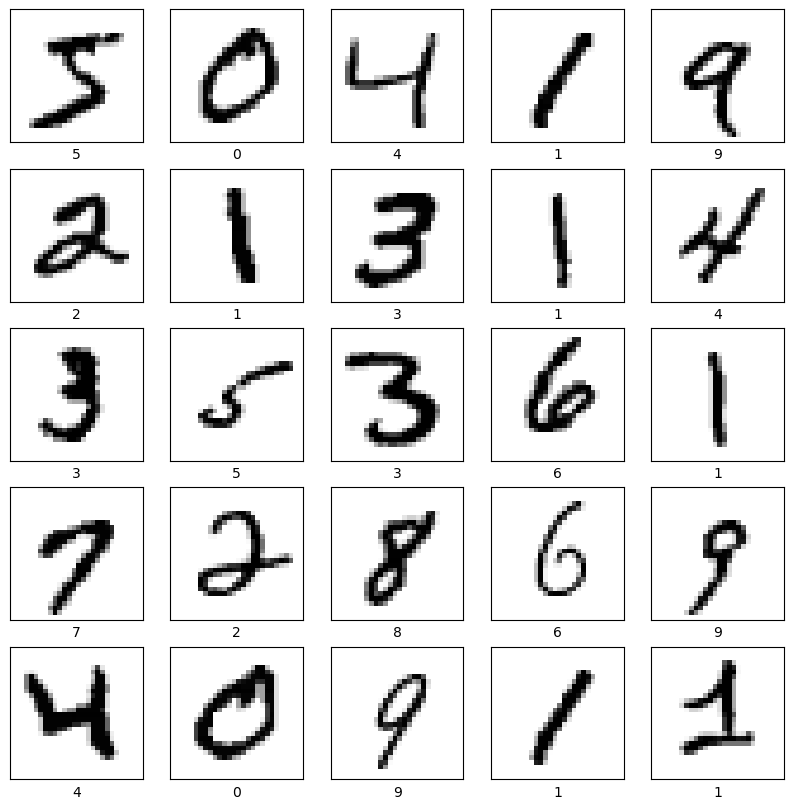

In [3]:
class_names = ['0','1','2','3','4','5','6','7','8','9']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [5]:
model = models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])
    

C:\ProgramData\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [7]:
history = model.fit(train_images,train_labels,epochs=5,validation_data=(test_images,test_labels))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 20ms/step - accuracy: 0.8971 - loss: 0.3226 - val_accuracy: 0.9845 - val_loss: 0.0472
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - accuracy: 0.9865 - loss: 0.0446 - val_accuracy: 0.9838 - val_loss: 0.0519
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 37s 20ms/step - accuracy: 0.9897 - loss: 0.0314 - val_accuracy: 0.9906 - val_loss: 0.0272
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9923 - loss: 0.0230 - val_accuracy: 0.9907 - val_loss: 0.0310
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 35s 18ms/step - accuracy: 0.9946 - loss: 0.0186 - val_accuracy: 0.9922 - val_loss: 0.0254


In [8]:
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 8ms/step - accuracy: 0.9922 - loss: 0.0254

Test accuracy: 0.9922000169754028
